In [ ]:
#Importing libraries
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Mounting the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Images files folder
data_dir = '/content/drive/MyDrive/natural_images/'

In [ ]:
#Normalizing, rotating and flipping the images by transforming using pytorch methods.
transformer = torchvision.transforms.Compose(
    [ # Applying Augmentation
        torchvision.transforms.Resize((144,144 )),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(10),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.2, 0.2, 0.2]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)

In [ ]:
#Setting the validation size
validation_size = 500
training_size = len(database) - validation_size

In [ ]:
#Splitting data in test and train dataset
trainset, testset = random_split(database, [training_size, validation_size])

In [ ]:
#Initializing batch size and creating list of batches in train and test datasets
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [ ]:
#Total classes or types of flowers
database.classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [ ]:
classes = ('airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person')

In [ ]:
classes[0]

'airplane'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


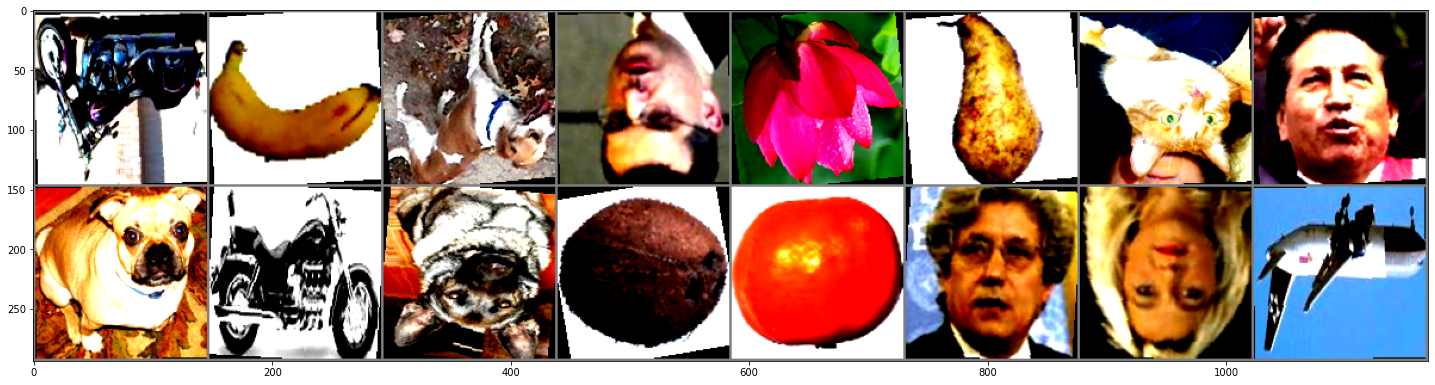

motorbike fruit dog   person flower fruit cat   person dog   motorbike dog   fruit fruit person person airplane


In [ ]:
#Showing 16 random images from a single random batch in a grid format
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
#Creating the model with 3 convultional layers and 3 pooling layers, 1 fully connected layers.
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=4, stride=2, padding=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=3)
        self.fc1 = nn.Linear(128*3*3, 1152)
        self.fc2 = nn.Linear(1152, 8)
        '''
        7th attempt
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=5, stride=3, padding=4)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(128,256, kernel_size=5, stride=3, padding=3)
        self.conv3 = nn.Conv2d(256, 512, kernel_size=5, stride=3, padding=3)
        self.fc1 = nn.Linear(512, 1152)
        self.fc2 = nn.Linear(1152, 5)
        6th attempt
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=4, stride=2, padding=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=3)
        self.fc1 = nn.Linear(128*2*2, 1152)
        self.fc2 = nn.Linear(1152, 5)
        5th attempt
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=66, kernel_size=4, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(66, 132, kernel_size=4, stride=1, padding=1)
        self.conv3 = nn.Conv2d(132, 396, kernel_size=4, stride=1, padding=1)
        self.fc1 = nn.Linear(396*9*9, 1152)
        self.fc2 = nn.Linear(1152, 5)

        3rd attempt & 4th attempt with other hyperparameters changed.
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128*12*12, 1152)
        self.fc2 = nn.Linear(1152, 5)
        
        2nd attempt
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(18, 36, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(36, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(256*3*3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 5)

        1st attempt
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(256*3*3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 5)
        '''

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        '''
        3rd 4th and 5th attempt
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        2nd attempt
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        1st attempt
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        '''
        return x


net = Net()

In [ ]:
import torch.optim as optim
#Initializing learning rate and beta value ; creating optimizer
criterion = nn.CrossEntropyLoss()
lr_dynamic = 0.01
momentum_dynamic = 0.9
optimizer = optim.SGD(net.parameters(), lr=lr_dynamic, momentum=momentum_dynamic)

In [ ]:
#Initializing lists for plotting the graphs of epoch vs loss
Epoch_list =[]
Loss_list =[]
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print(inputs.shape)
        #print(i)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            if i==99:
              Epoch_list.append((epoch) + 0.5)
            if i==199:
              Epoch_list.append((epoch) + 1)
            
            Loss_list.append(running_loss)
            running_loss = 0.0
            #Adjusting the learning rate for every approx half epoch with decay rate of 0.96
            lr_dynamic = 0.96*lr_dynamic
            optimizer = optim.SGD(net.parameters(), lr=lr_dynamic, momentum=momentum_dynamic) 


print('Finished Training')

[1,   100] loss: 1.700
[1,   200] loss: 1.149


KeyboardInterrupt: ignored

In [ ]:
for epoch in range(29,30):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print(inputs.shape)
        #print(i)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            if i==99:
              Epoch_list.append((epoch) + 0.25)
            if i==199:
              Epoch_list.append((epoch) + 0.5)
            if i==299:
              Epoch_list.append((epoch) + 0.75)
            if i==399:
              Epoch_list.append((epoch) + 1)
            
            Loss_list.append(running_loss)
            running_loss = 0.0
            #Adjusting the learning rate for every approx half epoch with decay rate of 0.96
            lr_dynamic = 0.96*lr_dynamic
            optimizer = optim.SGD(net.parameters(), lr=lr_dynamic, momentum=momentum_dynamic) 


print('Finished Training')

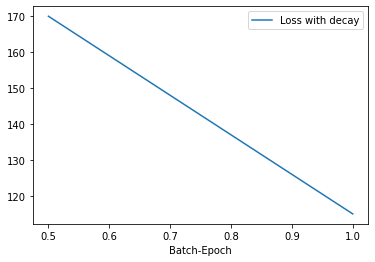

In [ ]:
#Plotting the graphs epoch vs loss
loss_df = pd.DataFrame(data={'Batch-Epoch': Epoch_list, 
                        'Loss with decay': Loss_list})
fig, ax = plt.subplots() # Create the figure and axes object

loss_df.plot(x = 'Batch-Epoch', y = 'Loss with decay', ax = ax) 

In [ ]:
#Saving the model
PATH = '/content/drive/MyDrive/flower_model/model.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


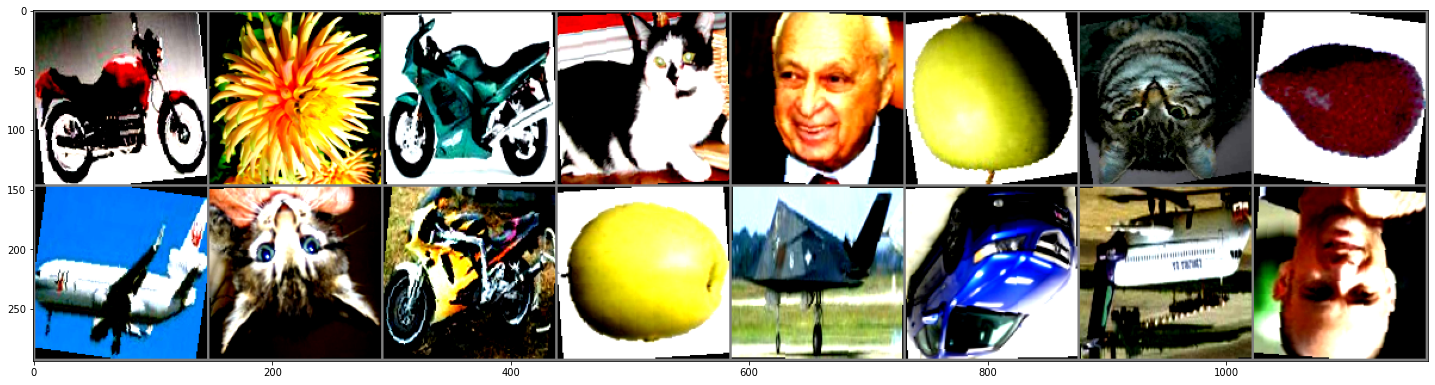

GroundTruth:  motorbike flower motorbike cat   person fruit cat   fruit airplane cat   motorbike fruit airplane car   airplane person


In [ ]:
#Showing 16 sample images of test dataset
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

In [ ]:
#Sample testing on model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
#Sample predictions
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(16)))

Predicted:  motorbike flower motorbike cat   person fruit cat   fruit airplane cat   motorbike fruit motorbike cat   airplane person


In [ ]:
#Series and dataframes to store actual and predicted values.
test_results = pd.DataFrame(columns = ['Actual_Image','Predicted_Image'])
Actual_Image= pd.Series(name='Actual_Image',dtype = str)
Predicted_Image= pd.Series(name='Predicted_Image',dtype = str)
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        Actual_Image = pd.concat([Actual_Image, pd.Series(labels.tolist(), name='Actual_Image')], ignore_index=True)
        Predicted_Image = pd.concat([Predicted_Image, pd.Series(predicted.tolist(), name='Predicted_Image')], ignore_index=True)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 500 test images: {100 * correct // total} %')


Accuracy of the network on the 500 test images: 66 %


In [ ]:
#Creating the test results dataframe
test_results = pd.concat([Actual_Image,Predicted_Image], axis = 1)

test_results['Actual_Image']    = test_results['Actual_Image'].map({0:'airplane',1: 'car',2: 'cat', 3: 'dog', 4:'flower', 5:'fruit', 6:'motorbike',7: 'person'})
test_results['Predicted_Image'] = test_results['Predicted_Image'].map({0:'airplane',1: 'car',2: 'cat', 3: 'dog', 4:'flower', 5:'fruit', 6:'motorbike',7: 'person'})
display(test_results)

,Actual_Image,Predicted_Image
0,motorbike,motorbike
1,flower,flower
2,motorbike,motorbike
3,cat,cat
4,person,person
...,...,...
495,motorbike,car
496,dog,person
497,car,car
498,cat,cat


In [ ]:
#Printing the metrics like confution matrix of final model prediction and also classification report.
print("Confusion matrix with true and predicted counts of each flower with ID:")
display(pd.crosstab(test_results['Actual_Image'].squeeze(), test_results['Predicted_Image'].squeeze(), rownames=['True'], colnames=['Predicted'], margins=True))

Confusion matrix with true and predicted counts of each flower with ID:


Predicted,airplane,car,cat,dog,flower,fruit,motorbike,person,All
True,,,,,,,,,
airplane,41,0,11,1,0,0,1,0,54
car,24,9,26,1,3,3,0,0,66
cat,3,0,67,1,8,2,0,1,82
dog,2,0,30,1,2,1,1,1,38
flower,1,1,10,0,47,0,0,0,59
fruit,0,0,0,0,0,79,0,0,79
motorbike,9,1,2,0,4,1,34,0,51
person,0,0,4,0,12,0,0,55,71
All,80,11,150,4,76,86,36,57,500


In [ ]:
from PIL import Image
from torch.autograd import Variable
image = Image.open('/content/a.jpg')
def get_probabilities(image):
  image = transformer(image)
  image = image.float()
  image = Variable(image, requires_grad=True)
  image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
  outputs = net(image)
  _, predicted = torch.max(outputs.data, 1)
  sm = torch.nn.Softmax()
  probabilities = sm(outputs) 
  probabilities = probabilities.detach().numpy()
  print(probabilities*100) #Converted to probabilities
  for i,j in enumerate(probabilities[0]):
    print(classes[i].ljust(15, ' ') ,':   ', round(j*100,4),'%')

In [ ]:
predicted.tolist()[0]

4

In [ ]:
get_probabilities(image)

[[ 0.8453356   2.5245042   8.130646    9.650773   75.66542     0.21725288
   0.63239276  2.3336704 ]]
airplane        :    0.8453 %
car             :    2.5245 %
cat             :    8.1306 %
dog             :    9.6508 %
flower          :    75.6654 %
fruit           :    0.2173 %
motorbike       :    0.6324 %
person          :    2.3337 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [ ]:
from torch.autograd import Variable
image = image.float()
image = Variable(image, requires_grad=True)
image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
outputs = net(image)
_, predicted = torch.max(outputs.data, 1)

In [ ]:
outputs.data

tensor([[-1.3258, -0.0850,  1.4542,  1.4581,  3.1197, -3.0592, -1.6833,  0.5844]])

In [ ]:
sm = torch.nn.Softmax()
probabilities = sm(outputs) 
probabilities = probabilities.detach().numpy()

print(probabilities*100) #Converted to probabilities
for i,j in enumerate(probabilities[0]):
  print(classes[i] ,':   ', round(j*100,4),'%')

[[ 0.7714339   2.6678147  12.43394    12.483027   65.75737     0.13629745
   0.53956604  5.210546  ]]
airplane :    0.7714 %
car :    2.6678 %
cat :    12.4339 %
dog :    12.483 %
flower :    65.7574 %
fruit :    0.1363 %
motorbike :    0.5396 %
person :    5.2105 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [ ]:
predicted

tensor([4])

In [ ]:
#Initializing batch size and creating list of batches in train and test datasets
batch_size = 16
imageloader = torch.utils.data.DataLoader(image, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
with torch.no_grad():
    for data in imageloader:
        images = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

TypeError: ignored